In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glacier import *
from tributary import *

ELA_0 = np.genfromtxt("ELA_spitsbergen.txt")
ELA_1 = np.genfromtxt("ELAdata001.txt")
ELA_2 = np.genfromtxt("ELAdata002.txt")
ELA_4 = np.genfromtxt("ELAdata004.txt")

[x1,y1] = np.genfromtxt("elevation_1.txt")

tributary_data = np.genfromtxt('Glacierbuckets.csv', delimiter=";", skip_header=1, usecols=(1,2,3,4,5,6,7))

parameters = [alpha, beta, nu, kappa, c, w, L0] = np.genfromtxt("parameters_veteranen.txt")

figsize = (8,4)
dpi = 300

In [2]:
v1 = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=ELA_1[0,0], E=ELA_1[0,1], name="Veteranen - 1K")
v2 = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=ELA_2[0,0], E=ELA_2[0,1], name="Veteranen - 2K")
v4 = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=ELA_4[0,0], E=ELA_4[0,1], name="Veteranen - 4K")

glaciers = [v1, v2, v4]

for glacier in glaciers:   
    glacier.width_glacier = 2930
    for [L, w0, h0, w1, h1, s, q] in tributary_data:
        glacier.add_bucket_tributary(L, w0, w1, h0, h1)

t = 1 #year
dt = 0.1

for i in range(np.shape(ELA_1)[0]-1):
    # change E at the start of each year
    glaciers[0].integrate(dt, t, E=ELA_1[i+1,1])

for i in range(np.shape(ELA_2)[0]-1):
    # change E at the start of each year
    glaciers[1].integrate(dt, t, E=ELA_2[i+1,1])

for i in range(np.shape(ELA_4)[0]-1):
    # change E at the start of each year
    glaciers[2].integrate(dt, t, E=ELA_4[i+1,1])

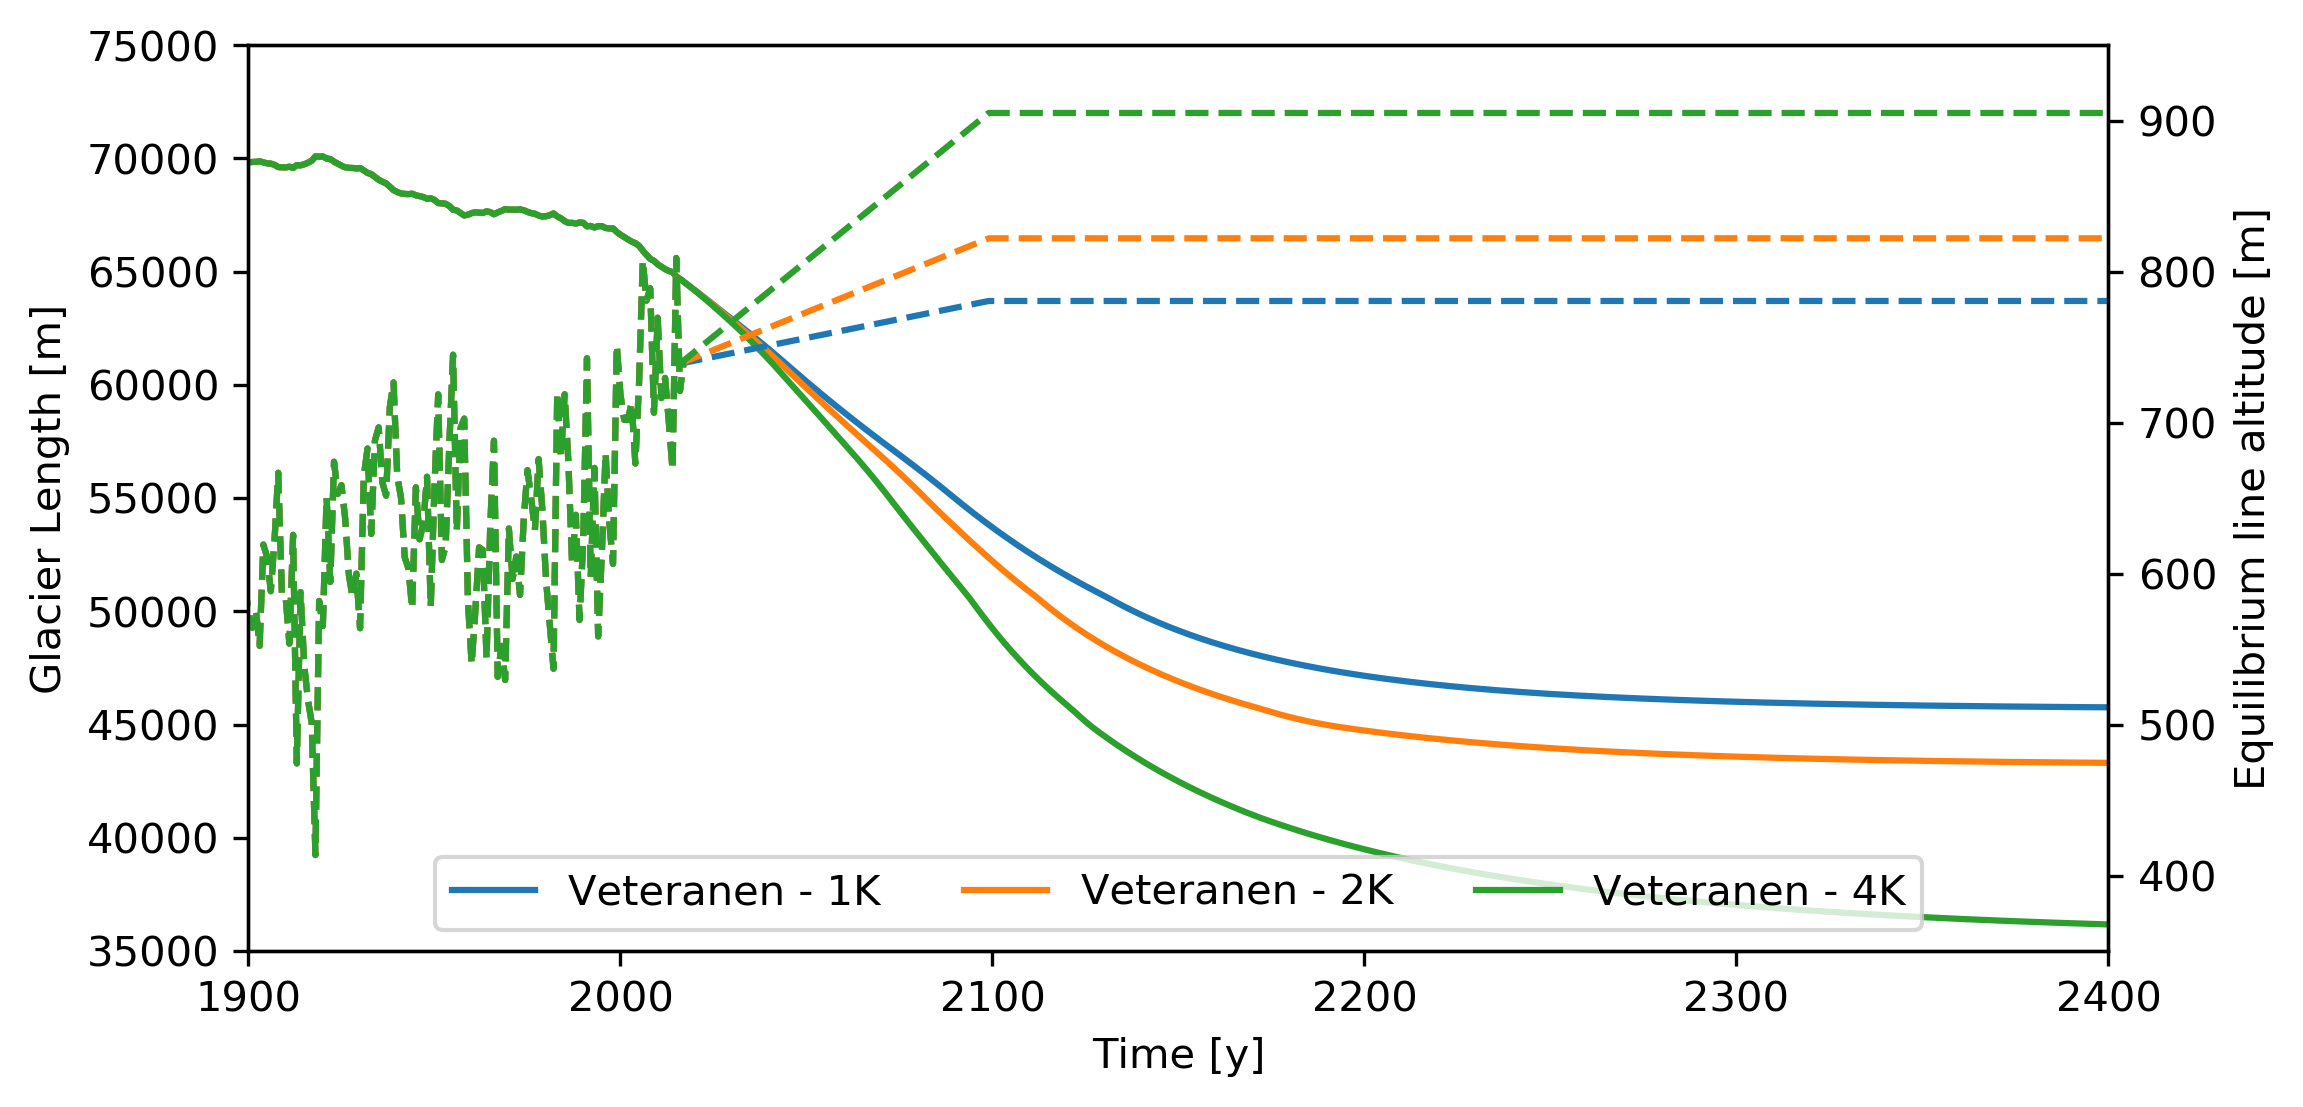

In [3]:
fig, ax1 = plt.subplots()
fig.set_size_inches(figsize)
fig.set_dpi(dpi)

for glacier in glaciers:
    ax1.plot(glacier.t, glacier.L, label=glacier.name)
    
plt.legend(loc="lower center", ncol=3)
# plt.grid()
# plt.title("Glacier length")

# ax1.plot([-5000, 5000], 2*[45000], "--", c="gray", linewidth=1) # sea
ax1.set_ylim(35000, 75000)
# ax1.set_yticks(np.arange(35000, 75001, 10000))

plt.xlim([1900, 2400])
plt.xlabel("Time [y]")
plt.ylabel("Glacier Length [m]")


ax2 = ax1.twinx()    
ax2.plot(ELA_1[:,0], ELA_1[:,1], "--")
ax2.plot(ELA_2[:,0], ELA_2[:,1], "--")
ax2.plot(ELA_4[:,0], ELA_4[:,1], "--")
ax2.set_ylabel("Equilibrium line altitude [m]")
ax2.set_ylim([350, 950])


plt.savefig("figures/veteranen_future.png")
plt.show()